MSE and MAPE at epoch  0  : 0.5371957779553154  , 658.3093093094207
MSE and MAPE at epoch  5  : 0.039750132382563495  , 160.96946438573443
MSE and MAPE at epoch  10  : 0.0009667327869940659  , 10.577070466880294
MSE and MAPE at epoch  15  : 0.0009249275310326184  , 8.15753257642074
MSE and MAPE at epoch  20  : 0.0009033701642806591  , 7.73411193624
MSE and MAPE at epoch  25  : 0.0008835134401515015  , 7.483162300072153
MSE and MAPE at epoch  30  : 0.0008647570614826128  , 7.316304602640987
MSE and MAPE at epoch  35  : 0.000846878678402847  , 7.194398717689382
MSE and MAPE at epoch  40  : 0.0008297773630001716  , 7.09762834869336
MSE and MAPE at epoch  45  : 0.0008133911988742416  , 7.014266946864331
MSE and MAPE at epoch  49  : 0.0008007646342530718  , 6.952961980142208


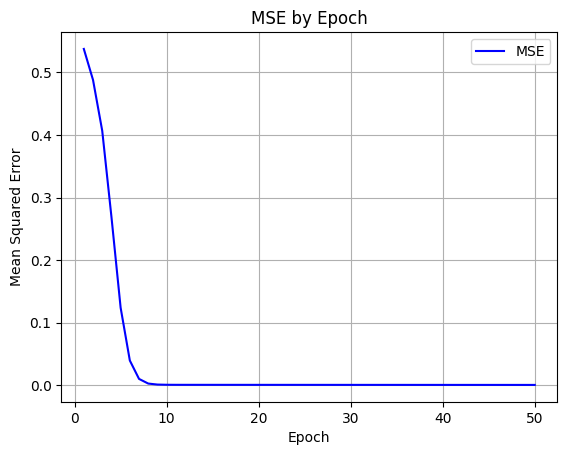

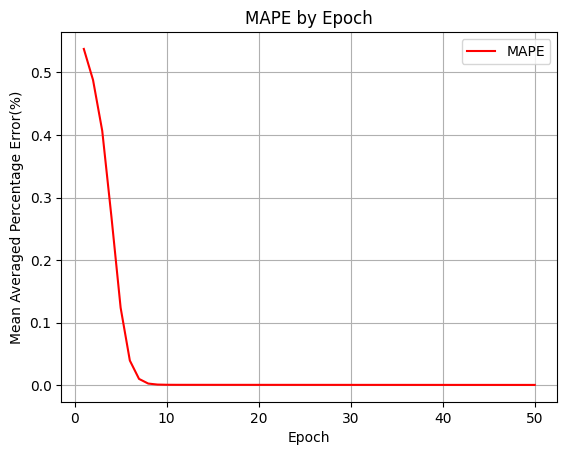

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
sample = 1000

feature1 = np.random.uniform(0, 1, sample)
feature2 = np.random.uniform(0, 1, sample)
feature_dummy = np.ones(sample)

Input = np.column_stack((feature1, feature2, feature_dummy)) #(1000,3)

y = 2 * feature1 + 3 * feature2 - 1

def sigmoid(x) :
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x) :
  return sigmoid(x) * (1 - sigmoid(x))

Input_layer_size = 3
Hidden_layer_size = 4
Output_layer_size = 1

W1 = np.random.rand(Hidden_layer_size, Input_layer_size)
W2 = np.random.rand(Hidden_layer_size)
b1 = np.random.rand(Output_layer_size, Hidden_layer_size)
b2 = np.random.rand(Output_layer_size)

alpha = 0.01
epochs = 50

MSE_list, MAPE_list = [], []
for epoch in range(epochs) :
  MSE, MAPE = 0, 0
  for iter in range(sample) :
    X = Input[iter]
    #feedforward
    Z_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
    Z = sigmoid(Z_tilde)
    y_pred = W2@Z.reshape(-1,1) + b2.reshape(-1,1)

    # Calculating the error
    J = 1/2*(y_pred-y[iter])**2
    MSE += J
    MAPE += np.abs((y_pred-y[iter])/y[iter])*100

    # Backpropagation
    # Output layer --> hidden layer
    dJdY = y_pred - y[iter]
    dJdW2 = dJdY * Z.T
    dJdb2 = dJdY

    dJdZ = dJdY * W2.reshape(-1, 1)
    dZ_dZ_tilde = sigmoid_derivative(Z_tilde)
    dJdZ_tilde = dJdZ * dZ_dZ_tilde

    dJdW1 = dJdZ_tilde @ X.reshape(1, -1)
    dJdb1 = dJdZ_tilde.T

    # Update
    W2 -= alpha * dJdW2.flatten()
    b2 -= alpha * dJdb2.flatten()
    W1 -= alpha * dJdW1
    b1 -= alpha * dJdb1

  MSE, MAPE = MSE / sample, MAPE / sample
  MSE_list.append(np.squeeze(MSE))
  MAPE_list.append(np.squeeze(MAPE))

  if epoch % 5 == 0 or epoch == epochs-1:
      print('MSE and MAPE at epoch ', epoch, ' :',
          np.squeeze(MSE), ' ,', np.squeeze(MAPE))

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MAPE', linewidth=1.5, color='r')
plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()